In [29]:
import pandas as pd
import re
import os
import importlib
import matplotlib.pyplot as plt
from matplotlib import cm
from IPython.display import display
import warnings
warnings.simplefilter('always')
import numpy as np
import importlib

import sys

project_root = '/Users/henrybaker/repositories/thesis_analysis'
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from scripts.a_data_loading_cleaning import run_load_clean_diagnose_data

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Data Loading & Cleaning

In [30]:
csv_path = f"results/controlled_results.csv"
df = run_load_clean_diagnose_data(csv_path)

✅ Total generated tokens value is constant: 16384
Original distribution:
total_generated_tokens
16384    2682
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Round 1: Verfifying FLOPs on raw df
NB: FLOPs values are NOT constant: [1.69499710e+13 2.02486233e+13 0.00000000e+00 5.26385823e+13]
Original distribution:
flops
0.000000e+00       5
1.694997e+13      22
2.024862e+13    2265
5.263858e+13     390
Name: count, dtype: int64

Dominant FLOPs value: 20248623316992.0
- Affected rows count: 417
- Affected row indices: [0, 36, 155, 234, 283, 426, 548, 617, 630, 683, 719, 761, 904, 1000, 1051, 1246, 1294, 1392, 1485, 1531, 1631, 1779, 1815, 2038, 2071, 2214, 2239, 2292, 2293, 2294, 2295, 2296, 2297, 2298, 2299, 2300, 2301, 2302, 2303, 2304, 2305, 2306, 2307, 2308, 2309, 2310, 2311, 2312, 2313, 2314, 2315, 2316, 2317, 2318, 2319, 2320, 2321, 2322, 2323, 2324, 2325, 2326, 2327, 2328, 2329, 2330, 2331, 2332, 2333, 2

/Users/henrybaker/repositories/thesis_analysis/scripts/a_data_loading_cleaning.py:611: UserWarning: NB: FLOPs values are NOT constant: [1.69499710e+13 2.02486233e+13 0.00000000e+00 5.26385823e+13]
  if not verify_flops(df):
/Users/henrybaker/repositories/thesis_analysis/scripts/a_data_loading_cleaning.py:621: UserWarning: NB: FLOPs values are NOT constant: [1.69499710e+13 5.26385823e+13]
  verify_flops(df)


# Exploratory Data Analysis (EDA)

In [31]:
# set up 1b and 3b subsets 
df_1b = df[df['model'].str.contains('1B')]
df_3b = df[df['model'].str.contains('3B')]

# set colours
all_models = sorted(
    set(df['model'])
    | set(df_1b['model'])
    | set(df_3b['model'])
)
n = len(all_models)

# base colormaps
cmap_energy     = cm.get_cmap('Blues')
cmap_throughput = cm.get_cmap('Reds')

# sample only from the mid→dark part of each map
energy_colors     = [cmap_energy(0.5 + 0.5 * i/(n-1)) for i in range(n)]
throughput_colors = [cmap_throughput(0.5 + 0.2 * i/(n-1)) for i in range(n)]

MODEL_COLOURS = {
    m: {
        'energy':     energy_colors[i],
        'throughput': throughput_colors[i]
    }
    for i, m in enumerate(all_models)
}

/var/folders/9b/zwzkyxhs7h7759872hzp3mz80000gn/T/ipykernel_71971/1769363396.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_energy     = cm.get_cmap('Blues')
/var/folders/9b/zwzkyxhs7h7759872hzp3mz80000gn/T/ipykernel_71971/1769363396.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_throughput = cm.get_cmap('Reds')


📊 Plotting histogram...


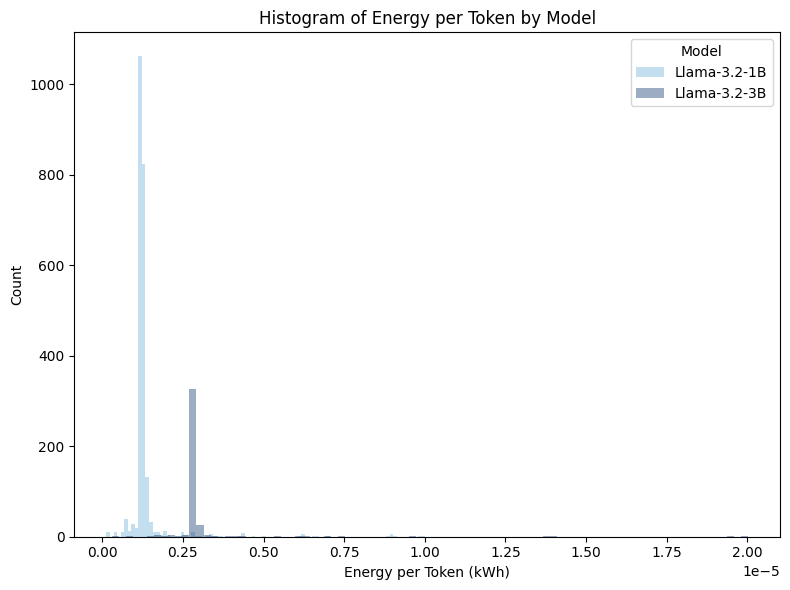

📦 Plotting boxplot...


/Users/henrybaker/repositories/thesis_analysis/scripts/b_exploratory_data_analysis.py:54: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(data, vert=False, patch_artist=True, labels=models)
/Users/henrybaker/repositories/thesis_analysis/scripts/b_exploratory_data_analysis.py:54: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  box = ax.boxplot(data, vert=False, patch_artist=True, labels=models)


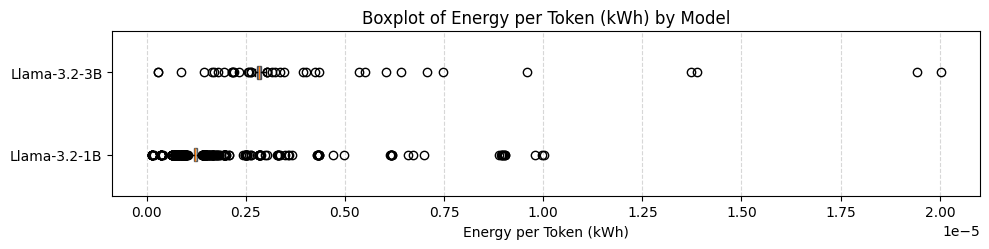

📊 Plotting individual histogram...


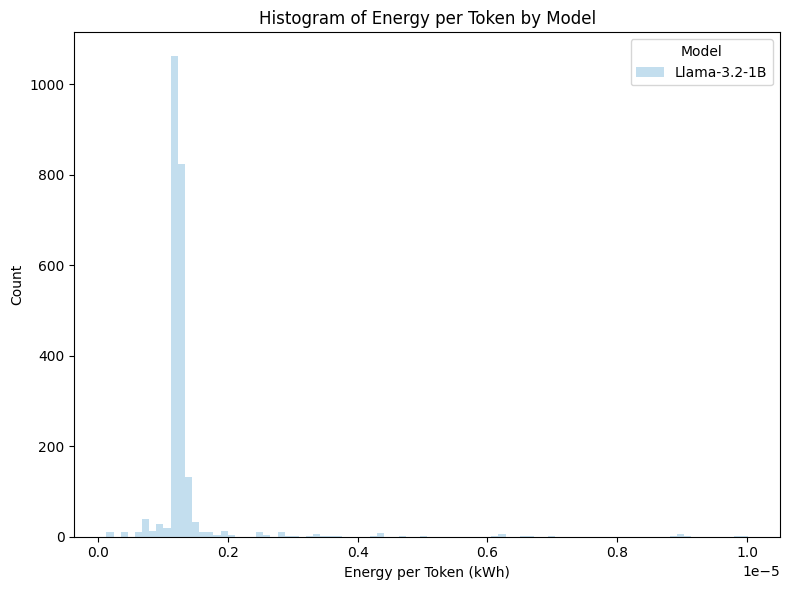

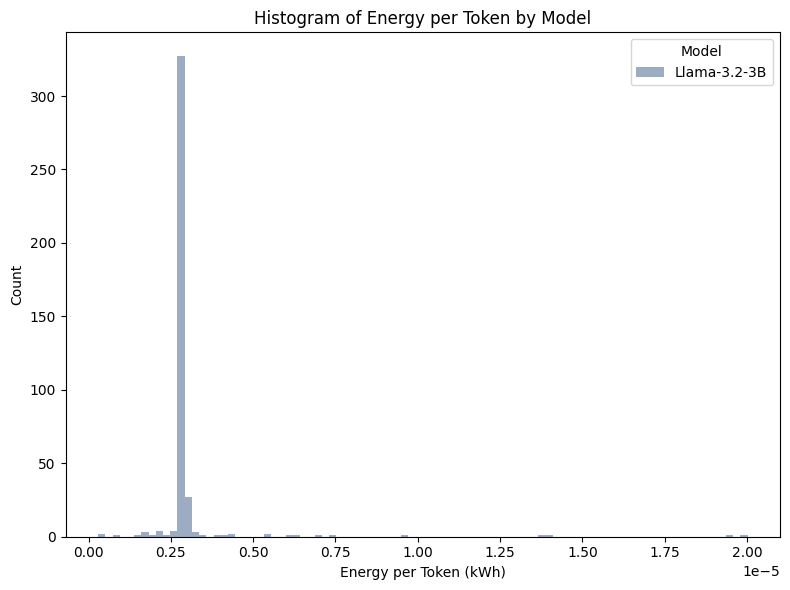

🔬 Scatter: by model...


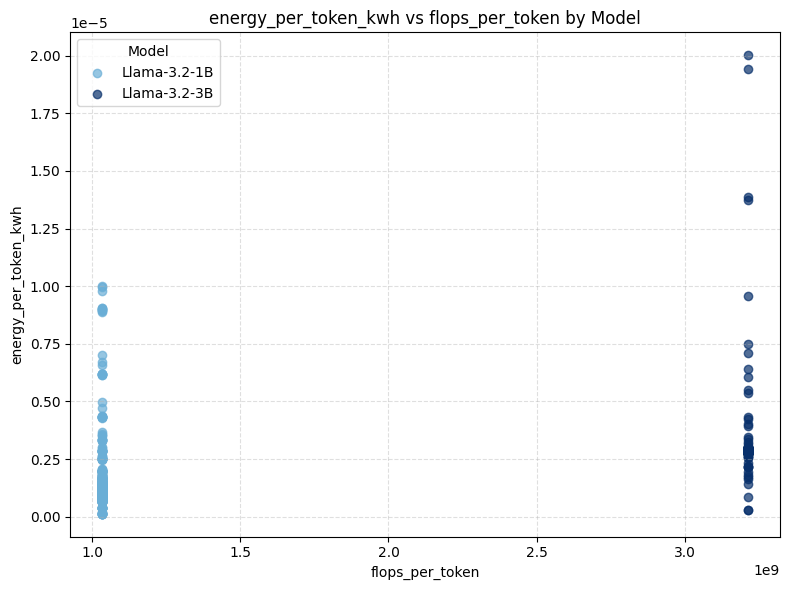

🔗 Correlation matrix...


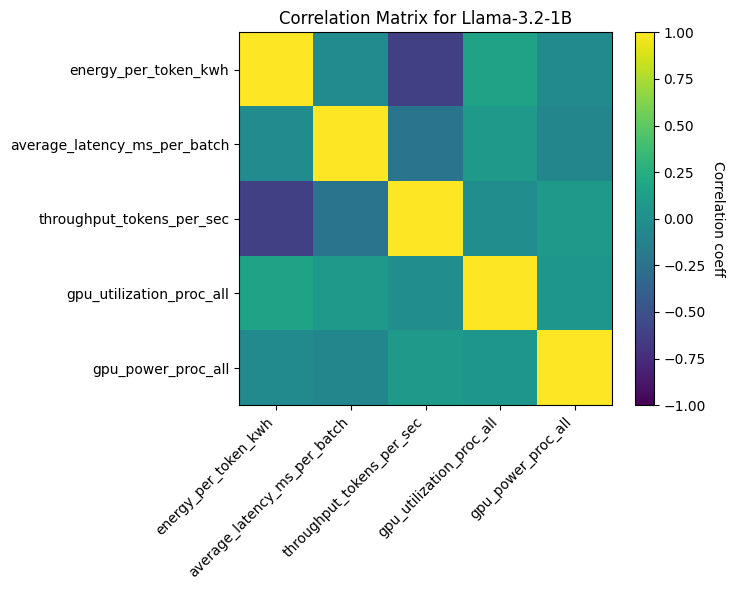

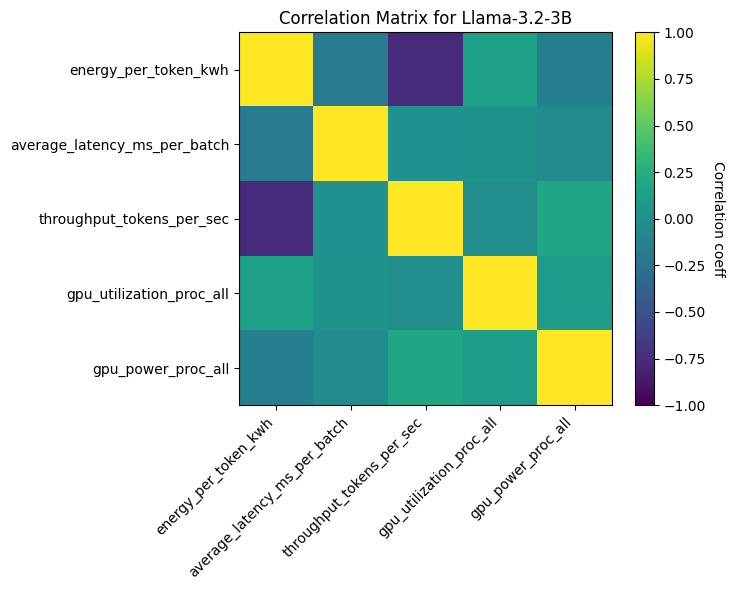

🔬 Scatter: Throughput vs energy...


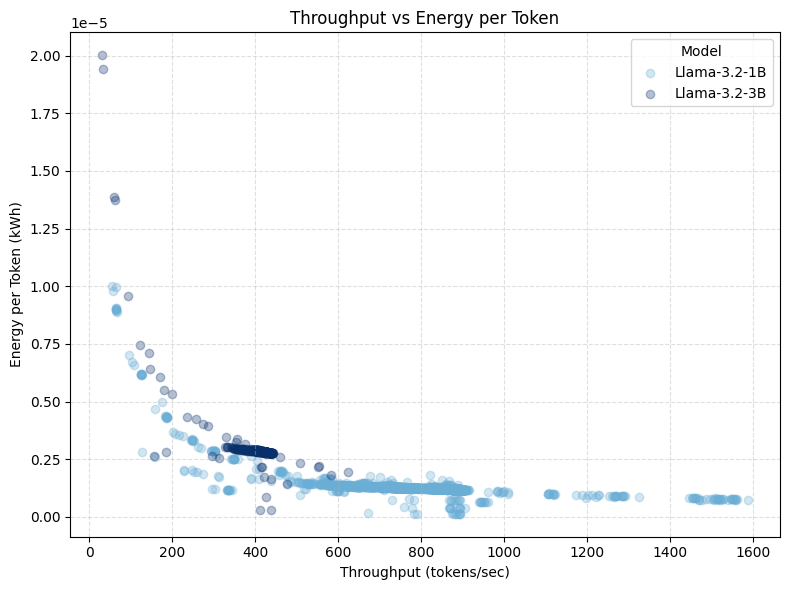

📈 Scatter: Divergence patterns...


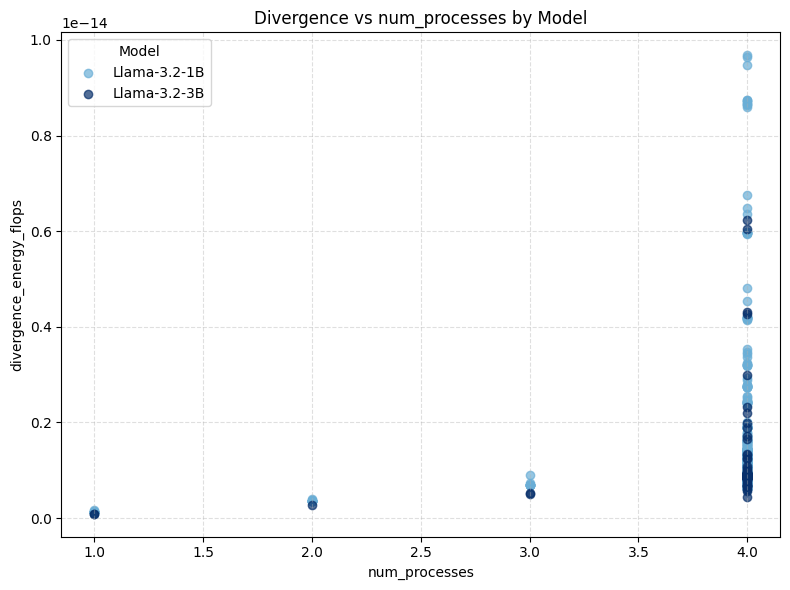

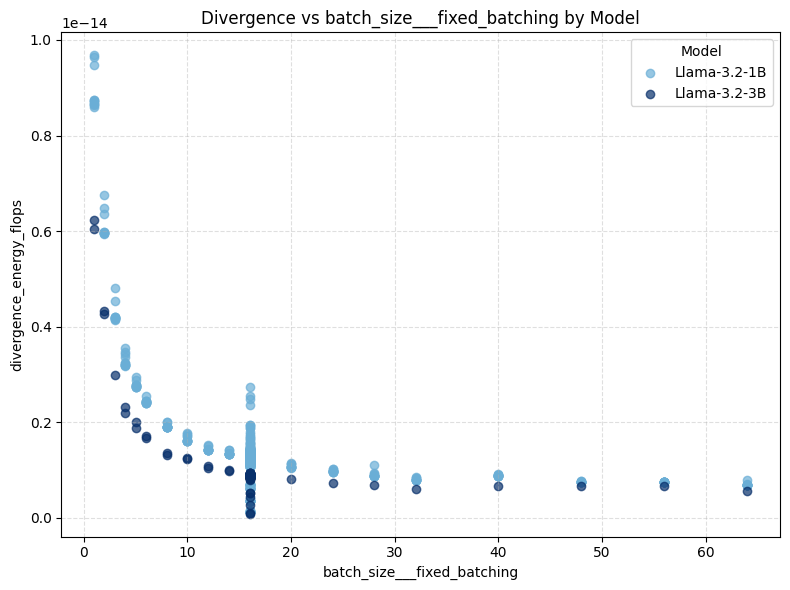

Skipping non-numeric column 'decoder_config_decoding_mode'


In [32]:
import scripts.b_exploratory_data_analysis as eda
importlib.reload(eda)

eda.plot_all_diagnostics(df, df_1b, df_3b, MODEL_COLOURS)

TO DO:
- [ ] do a proper grid search on both models-> be able to properly compare e.g. num processes against everything  at all levels!
- [ ] throughput is clearly important! plot it in each of the controlled plots !!!
- [ ] also print average_latency_ms_per_batch

outcome vars to plot across controlled vars
- [ ] energy_per_token_kwh_mean
- [ ] average_latency_ms_per_batch
- [ ] throughput_tokens_per_sec_mean

Then do as a full grid search -> don't filter the db, but print at all levels

# CONTROLLED EXPERIMENT PLOTS

These are different to the subsequent grid search plots, as we are ONLY varying one variable against a (somewhat arbitrary) baseline.

- currently it works on subsetted dfs, but once done grid search: get it to work on full df -> capture variance at diff points

- [ ] change normalised axes to say 'normalised to baseline' (some say normalised, some don't say anything)

- [x] Normalise axes as z-scores
- [x] if decoder temp remains a mess, print stratified by cycle
- [x] on latency axis, print out the interval range!
- [x] top p and k value normalised plots: the y axis does not have 'normalised'
- [x] add the baseline annotation BELOW the red dotted line
- [x] do as full grid search
- [x] FLOPs to be visually diff
- [x] decoder temp yaxis not normalising
- [x] remove the FLOPs line from the Deocder & Latency plots


In [33]:
configs = ['num_processes', 'batching','precis', 'decoding', 'latency']
dfs = {config: df[df['config_name'].str.startswith(config)] for config in configs}

## Number of Process plots

In [34]:
import scripts.c_vis_proc_precis_batch as viz
importlib.reload(viz)

from scripts.c_vis_proc_precis_batch import (
    plot_num_processes,
    plot_batching,
    plot_precision,
    #plot_decoder_temperature,
    #plot_decoder_topk,
    #plot_decoder_topp,
    #plot_latency_by_burst_size,
    #plot_latency_by_burst_interval,
)

# 1) Number of processes

plot_num_processes(
    dfs,
    ax1='energy_per_token',
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    add_baseline_throughput=False
)

plot_num_processes(
    dfs,
    ax1='energy_per_token',
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    add_baseline_throughput=False
)

plot_num_processes(
    dfs,
    ax1='energy_per_token',
    ax2='throughput_tokens_per_sec',
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    add_baseline_throughput=False
)

plot_num_processes(
    dfs,
    ax1='energy_per_token',
    ax2='throughput_tokens_per_sec',
    normalise_axes=['ax1', 'ax2'],
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    add_baseline_throughput=False
)



/Users/henrybaker/miniconda3/envs/thesis/lib/python3.12/site-packages/executing/executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
/Users/henrybaker/miniconda3/envs/thesis/lib/python3.12/ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)
/Users/henrybaker/miniconda3/envs/thesis/lib/python3.12/site-packages/executing/executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
/Users/henrybaker/miniconda3/envs/thesis/lib/python3.12/ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)


AttributeError: 'NoneType' object has no attribute 'items'

## Batching plots

In [ ]:
# 2) Batch size
plot_batching(
    dfs,
    ax1='energy_per_token',
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    add_baseline_throughput=False
    )

plot_batching(
    dfs,
    ax1='energy_per_token',
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    add_baseline_throughput=False
    )

plot_batching(
    dfs,
    ax1='energy_per_token',
    ax2='throughput_tokens_per_sec',
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    add_baseline_throughput=False
)

plot_batching(
    dfs,
    ax1='energy_per_token',
    ax2='throughput_tokens_per_sec',
    normalise_axes=['ax1', 'ax2'],
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    add_baseline_throughput=False
)



## Precision plots

In [ ]:
# 3) Precision modes (FP32/FP16/INT8/INT4)
plot_precision(
    dfs,
    ax1='energy_per_token',
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    add_baseline_throughput=False
)
plot_precision(
    dfs,
    ax1='energy_per_token',
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    add_baseline_throughput=False
)

plot_precision(
    dfs,
    ax1='energy_per_token',
    ax2='throughput_tokens_per_sec',
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    add_baseline_throughput=False
)

plot_precision(
    dfs,
    ax1='energy_per_token',
    ax2='throughput_tokens_per_sec',
    normalise_axes=['ax1', 'ax2'],
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    add_baseline_throughput=False
)

## Decoder Plots

### (i) Across Decoder Temperature, grouped  by mode

In [ ]:
import scripts.d_vis_decoder_old_working as viz_decoder
importlib.reload(viz_decoder)

from scripts.d_vis_decoder_old_working import plot_decoder_temperature

plot_decoder_temperature(
    dfs=dfs,
    model=['Llama-3.2-1B', 'Llama-3.2-3B'],
    normalise_axes=[],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

plot_decoder_temperature(
    dfs=dfs,
    model=['Llama-3.2-1B'],
    normalise_axes=[],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

plot_decoder_temperature(
    dfs=dfs,
    model=['Llama-3.2-3B'],
    normalise_axes=[],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )


In [ ]:
plot_decoder_temperature(
    dfs=dfs,
    model=['Llama-3.2-1B', 'Llama-3.2-3B'],
    normalise_axes=['ax1', 'ax2'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

plot_decoder_temperature(
    dfs=dfs,
    model=['Llama-3.2-1B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

plot_decoder_temperature(
    dfs=dfs,
    model=['Llama-3.2-3B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

Plotting the meaned stat with 1std is messy: choosing individual runs.

In [ ]:
plot_decoder_temperature(
    dfs=dfs,
    model=['Llama-3.2-1B', 'Llama-3.2-3B'],
    normalise_axes=['ax1', 'ax2'],
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=1
    )

plot_decoder_temperature(
    dfs=dfs,
    model=['Llama-3.2-1B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=2
    )

plot_decoder_temperature(
    dfs=dfs,
    model=['Llama-3.2-3B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=1
    )

- All of them vs the greedy baseline are higher.
- top p consistenly the highest
- 

to do:
- change the blue label (it's not greedy, it's stochastic???)

### (ii) Across Top-k values, grouped by temperature

In [ ]:
import scripts.d_vis_decoder_old_working as viz_decoder
importlib.reload(viz_decoder)

from scripts.d_vis_decoder_old_working import plot_decoder_temperature, plot_decoder_top_k

plot_decoder_top_k(
    dfs=dfs,
    model=['Llama-3.2-1B', 'Llama-3.2-3B'],
    normalise_axes=[],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

plot_decoder_top_k(
    dfs=dfs,
    model=['Llama-3.2-1B'],
    normalise_axes=[],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

plot_decoder_top_k(
    dfs=dfs,
    model=['Llama-3.2-3B'],
    normalise_axes=[],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )


In [ ]:
plot_decoder_top_k(
    dfs=dfs,
    model=['Llama-3.2-1B', 'Llama-3.2-3B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

plot_decoder_top_k(
    dfs=dfs,
    model=['Llama-3.2-1B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

plot_decoder_top_k(
    dfs=dfs,
    model=['Llama-3.2-3B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

It's pretty much just noise. Trying below with a few selected runs.

1) 1B model

In [ ]:
plot_decoder_top_k(
    dfs=dfs,
    model=['Llama-3.2-1B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=1
    )
plot_decoder_top_k(
    dfs=dfs,
    model=['Llama-3.2-1B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=2
    )
plot_decoder_top_k(
    dfs=dfs,
    model=['Llama-3.2-1B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=3
    )

2. 3B model

In [ ]:
plot_decoder_top_k(
    dfs=dfs,
    model=['Llama-3.2-3B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=1
    )
plot_decoder_top_k(
    dfs=dfs,
    model=['Llama-3.2-3B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=2
    )

Just noise - no real trends 

### (iii) Across Top-p values, grouped by temperature

In [ ]:
import scripts.d_vis_decoder as viz_decoder
importlib.reload(viz_decoder)

from scripts.d_vis_decoder import plot_decoder_temperature, plot_decoder_top_k, plot_decoder_top_p

plot_decoder_top_p(
    dfs=dfs,
    model=['Llama-3.2-1B', 'Llama-3.2-3B'],
    normalise_axes=[],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

plot_decoder_top_p(
    dfs=dfs,
    model=['Llama-3.2-1B'],
    normalise_axes=[],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

plot_decoder_top_p(
    dfs=dfs,
    model=['Llama-3.2-3B'],
    normalise_axes=[],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )


In [ ]:
plot_decoder_top_p(
    dfs=dfs,
    model=['Llama-3.2-1B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

plot_decoder_top_p(
    dfs=dfs,
    model=['Llama-3.2-1B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=1
    )

plot_decoder_top_p(
    dfs=dfs,
    model=['Llama-3.2-1B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=2
    )

plot_decoder_top_p(
    dfs=dfs,
    model=['Llama-3.2-1B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=3
    )

Can see that higher temp consistnely have higher energy consumption, but no trend in increasing top p value

In [ ]:
import scripts.d_vis_decoder as viz_decoder
importlib.reload(viz_decoder)

from scripts.d_vis_decoder import plot_decoder_temperature, plot_decoder_top_k, plot_decoder_top_p

plot_decoder_top_p(
    dfs=dfs,
    model=['Llama-3.2-1B', 'Llama-3.2-3B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

plot_decoder_top_p(
    dfs=dfs,
    model=['Llama-3.2-1B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

plot_decoder_top_p(
    dfs=dfs,
    model=['Llama-3.2-3B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

## Latency Plots

### (i) by burst size

/Users/henrybaker/repositories/thesis_analysis/scripts/e_vis_latency.py:127: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  # build (label, col, color)


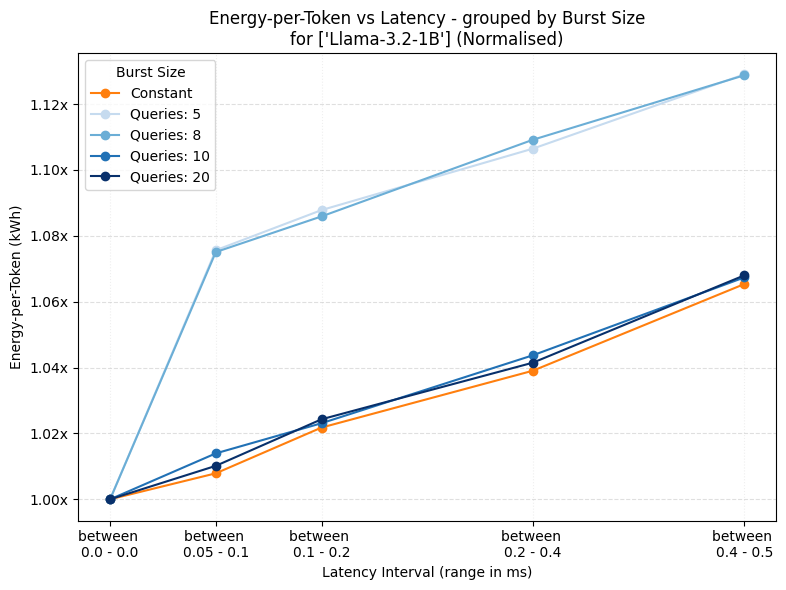

/Users/henrybaker/repositories/thesis_analysis/scripts/e_vis_latency.py:127: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  # build (label, col, color)


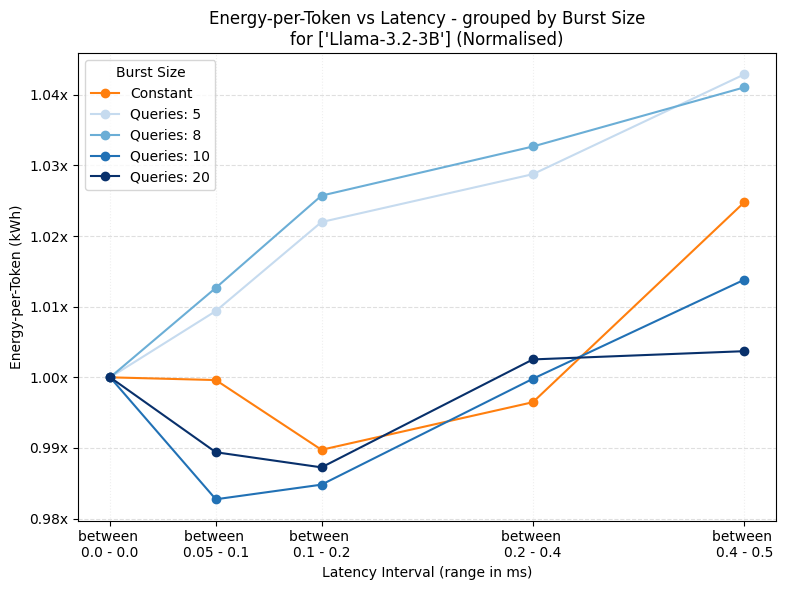

In [41]:
import scripts.e_vis_latency as vis_latency
importlib.reload(vis_latency)

from scripts.e_vis_latency import plot_latency_burst_size

plot_latency_burst_size(
    dfs=dfs,
    model=['Llama-3.2-1B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=1
    )

plot_latency_burst_size(
    dfs=dfs,
    model=['Llama-3.2-3B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

/Users/henrybaker/repositories/thesis_analysis/scripts/e_vis_latency.py:127: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  # build (label, col, color)


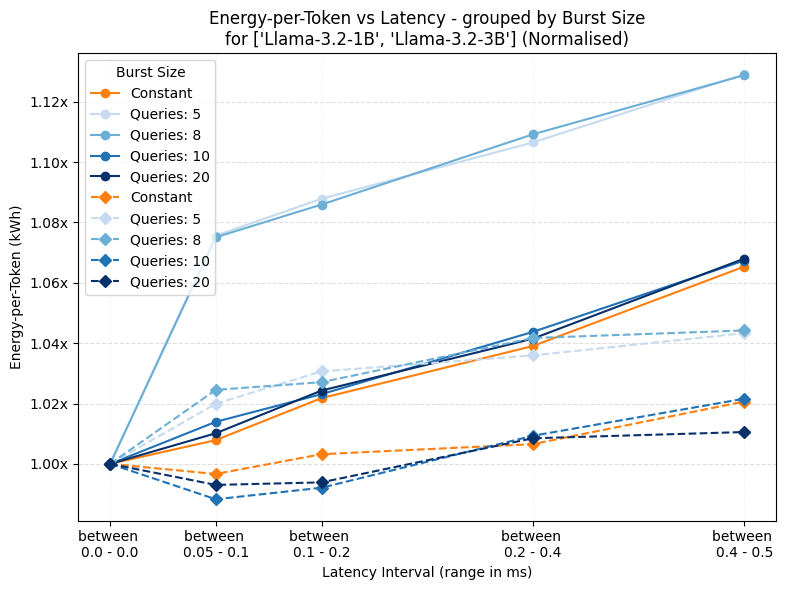

/Users/henrybaker/repositories/thesis_analysis/scripts/e_vis_latency.py:127: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  # build (label, col, color)


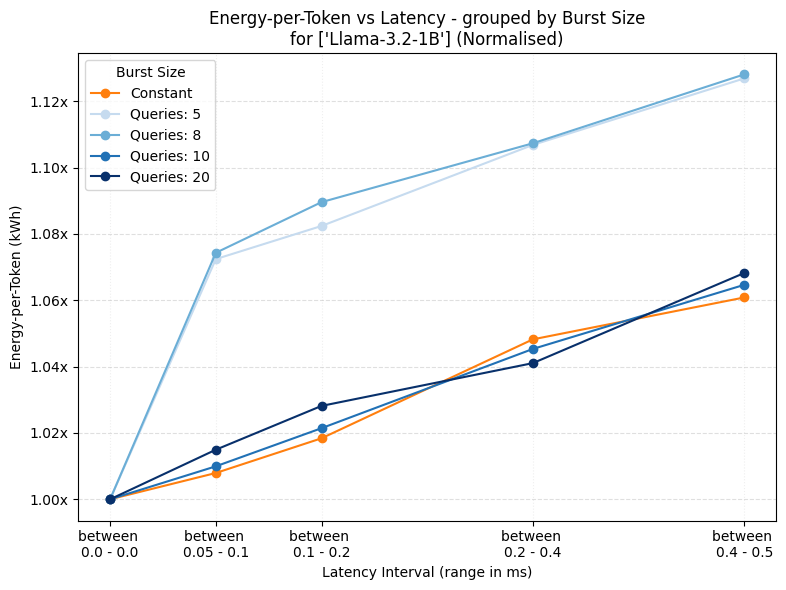

/Users/henrybaker/repositories/thesis_analysis/scripts/e_vis_latency.py:127: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  # build (label, col, color)


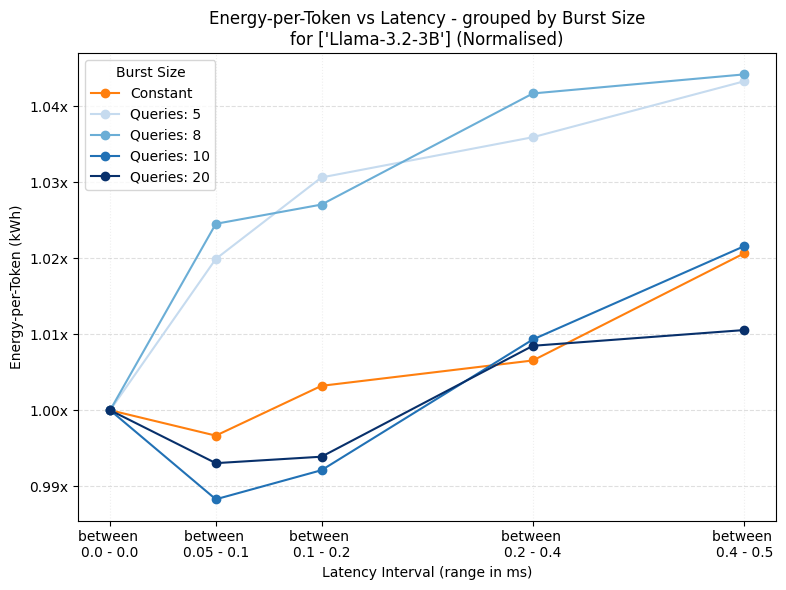

In [42]:
import scripts.e_vis_latency as vis_latency
importlib.reload(vis_latency)

from scripts.e_vis_latency import plot_latency_burst_size

plot_latency_burst_size(
    dfs=dfs,
    model=['Llama-3.2-1B', 'Llama-3.2-3B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=1
)

plot_latency_burst_size(
    dfs=dfs,
    model=['Llama-3.2-1B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=2
    )

plot_latency_burst_size(
    dfs=dfs,
    model=['Llama-3.2-3B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=1
    )

### (ii) by burst interal

/Users/henrybaker/repositories/thesis_analysis/scripts/e_vis_latency.py:254: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Greens', len(intervals)+1)


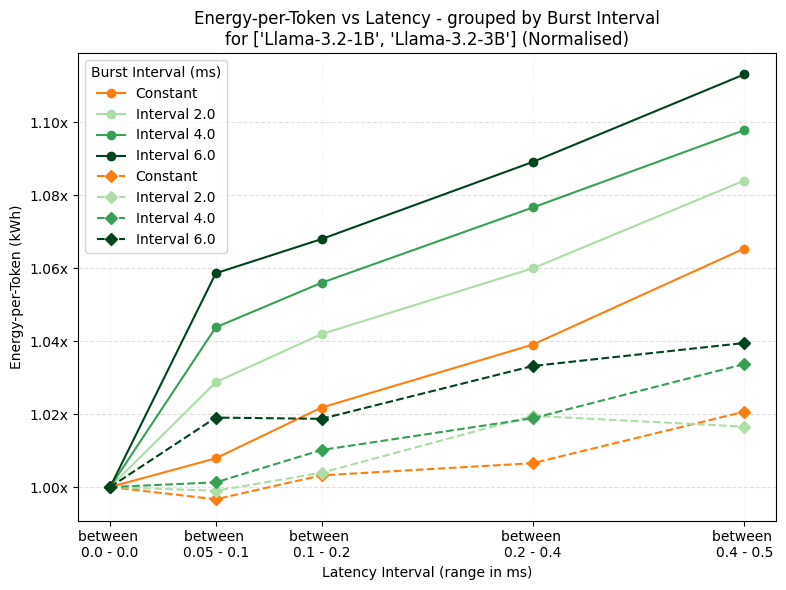

/Users/henrybaker/repositories/thesis_analysis/scripts/e_vis_latency.py:254: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Greens', len(intervals)+1)


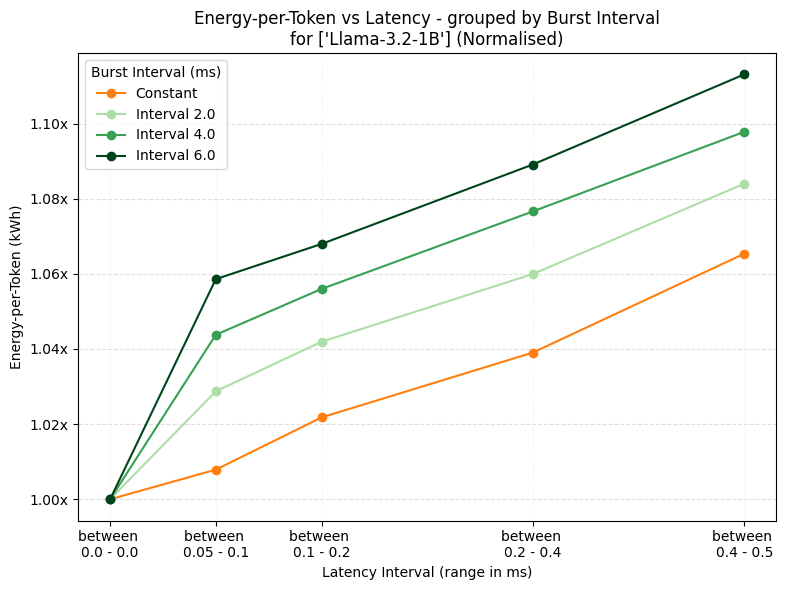

/Users/henrybaker/repositories/thesis_analysis/scripts/e_vis_latency.py:254: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Greens', len(intervals)+1)


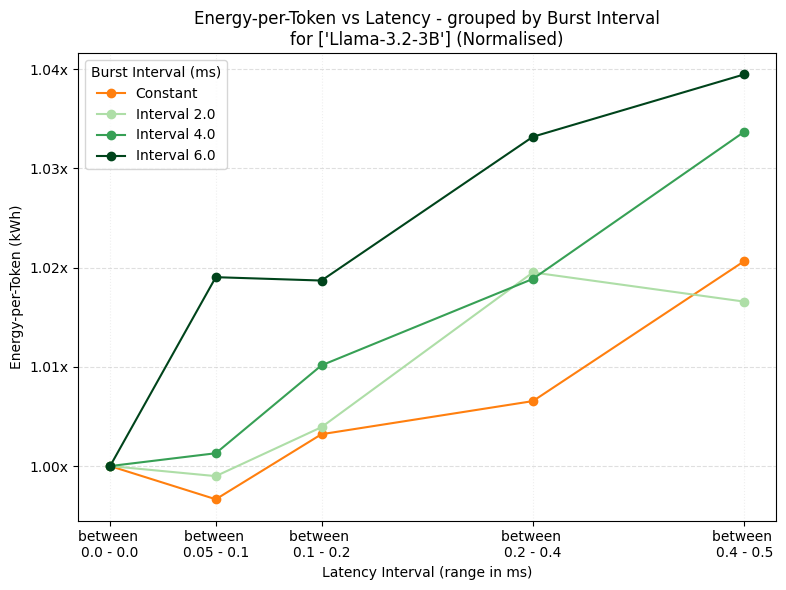

In [43]:
import scripts.e_vis_latency as vis_latency
importlib.reload(vis_latency)

from scripts.e_vis_latency import plot_latency_burst_interval

plot_latency_burst_interval(
    dfs=dfs,
    model=['Llama-3.2-1B', 'Llama-3.2-3B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=1
)

plot_latency_burst_interval(
    dfs=dfs,
    model=['Llama-3.2-1B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=1
    )

plot_latency_burst_interval(
    dfs=dfs,
    model=['Llama-3.2-3B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=1
    )

# plot: batch size on x axis, group by number of processes

# Grid search plots

This is different to the controlled experiments, where we kept everything constant and plotted against a (somewhat arbitrary) baseline. This should demonstrate the areas of parameter space (i.e. of a selected variable along the x axis) where there is variation (driven by variation in the other variables)